# 1.Importing Kaggle API and Downloading Dataset

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"atharvaumbarkar","key":"1a287e5c666a157fd3a13c5edd0cfdc3"}'}

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c digit-recognizer

 82% 5.00M/6.09M [00:00<00:00, 31.8MB/s]
100% 6.09M/6.09M [00:00<00:00, 29.8MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 73.1MB/s]
 55% 5.00M/9.16M [00:00<00:00, 18.8MB/s]
100% 9.16M/9.16M [00:00<00:00, 30.6MB/s]


In [5]:
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [6]:
!rm test.csv.zip
!rm train.csv.zip

# 2.Importing basic libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 3.Preprocessing data for training and testing

> ## Loading the data

In [8]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
samp_sub_df = pd.read_csv('sample_submission.csv')

In [9]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
samp_sub_df

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


> ## Visualizing data

Label = 9


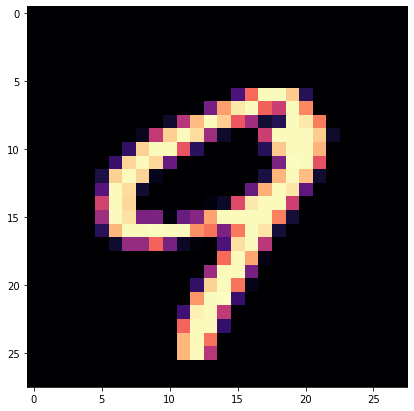

In [12]:
plt.figure(figsize=(7,7))
row_index = 100

print('Label =', train_df.label.iloc[row_index])
temp = np.array(train_df.iloc[row_index][1:]).reshape(28,28)
plt.imshow(temp, interpolation = 'none', cmap= "magma")
plt.show()

> ## Creating final inputs

In [13]:
X_train = np.array(train_df.iloc[:,1:])
y_train = np.array(train_df.iloc[:,0])
X_test = np.array(test_df)

# 4.Creating the Model

> ## Importing necessary libraries for model creation

In [19]:
from keras.models import Sequential
from keras.activations import relu
from keras.activations import softmax
from keras.layers import Dense

In [22]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import  Flatten

> ## Defining and training the model

>> ### 1.Simple 3-Layer RNN 

In [ ]:
input_dim = X_train.shape[1]

In [ ]:
rnn_model = Sequential(name = 'Digit_Recognizer_RNN')
rnn_model.add(Dense(20, input_shape = (input_dim,), activation = 'relu'))
rnn_model.add(Dense(15, activation = 'relu'))
rnn_model.add(Dense(5, activation = 'relu'))
rnn_model.add(Dense(10, activation = 'softmax'))

In [ ]:
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
rnn_model.summary()

Model: "Digit_Recognizer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_5 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                60        
Total params: 16,155
Trainable params: 16,155
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=20)

Epoch 1/50
42000/42000 [==============================] - 6s 140us/step - loss: 2.2235 - accuracy: 0.2116
Epoch 2/50
42000/42000 [==============================] - 6s 139us/step - loss: 1.5873 - accuracy: 0.3672
Epoch 3/50
42000/42000 [==============================] - 6s 139us/step - loss: 1.3194 - accuracy: 0.4740
Epoch 4/50
42000/42000 [==============================] - 6s 141us/step - loss: 1.0789 - accuracy: 0.5652
Epoch 5/50
42000/42000 [==============================] - 6s 143us/step - loss: 0.8412 - accuracy: 0.6780
Epoch 6/50
42000/42000 [==============================] - 6s 145us/step - loss: 0.7025 - accuracy: 0.7286
Epoch 7/50
42000/42000 [==============================] - 6s 149us/step - loss: 0.5140 - accuracy: 0.8427
Epoch 8/50
42000/42000 [==============================] - 6s 152us/step - loss: 0.3812 - accuracy: 0.8993
Epoch 9/50
42000/42000 [==============================] - 6s 145us/step - loss: 0.3112 - accuracy: 0.9171
Epoch 10/50
42000/42000 [=====================

>> ### Plotting model data

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


Text(0.5, 1.0, 'Model Loss')

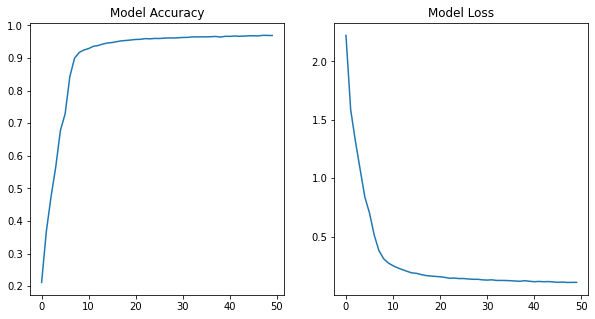

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (10,5))
ax[0].plot(history.history['accuracy'])
ax[0].set_title('RNN Model Accuracy')
ax[1].plot(history.history['loss'])
ax[1].set_title('RNN Model Loss')

>> ### Creating Predictions

In [ ]:
preds = rnn_model.predict_classes(X_test)

>> ### 2.Convolutional Network

In [15]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [28]:
X_train.shape

(42000, 28, 28, 1)

In [37]:
cnn_model = Sequential(name = 'Digit_Recognizer_CNN')

cnn_model.add(Conv2D(32, kernel_size=(5,5), padding='same', activation='relu', input_shape = (28,28,1)))
cnn_model.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
cnn_model.add(BatchNormalization(axis=3))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization(axis=3))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))

In [39]:
cnn_model.summary()

Model: "Digit_Recognizer_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        51264     
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64

In [38]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
history = cnn_model.fit(X_train, y_train, epochs=8 batch_size=20)

Epoch 1/5
42000/42000 [==============================] - 26s 613us/step - loss: 0.0156 - accuracy: 0.9951
Epoch 2/5
42000/42000 [==============================] - 25s 602us/step - loss: 0.0153 - accuracy: 0.9952
Epoch 3/5
42000/42000 [==============================] - 25s 602us/step - loss: 0.0102 - accuracy: 0.9966
Epoch 4/5
42000/42000 [==============================] - 25s 601us/step - loss: 0.0082 - accuracy: 0.9973
Epoch 5/5
42000/42000 [==============================] - 26s 614us/step - loss: 0.0095 - accuracy: 0.9966


>> ### Plotting model data

In [43]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


Text(0.5, 1.0, 'CNN Model Loss')

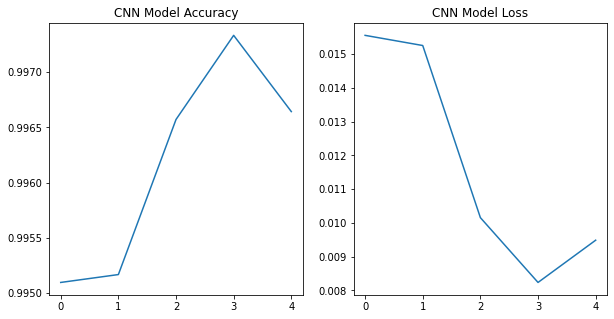

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (10,5))
ax[0].plot(history.history['accuracy'])
ax[0].set_title('CNN Model Accuracy')
ax[1].plot(history.history['loss'])
ax[1].set_title('CNN Model Loss')

>> ### Creating Predictions

In [45]:
preds = cnn_model.predict_classes(X_test)

# 5.Creating Submission

In [46]:
temp = {'ImageId':samp_sub_df.ImageId, 'Label':preds}

In [47]:
sub_df = pd.DataFrame(temp)
sub_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [49]:
sub_df.to_csv('simple_cnn.csv',index=False)

# 6.Testing on custom images

In [108]:
from PIL import Image
from PIL import ImageOps

(28, 28)
L


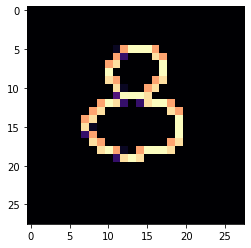

In [112]:
image = Image.open('8.png')
image = image.convert('L')
image = image.resize((28,28))
image = ImageOps.invert(image)
print(image.size)
print(image.mode)
plt.imshow(image, cmap='magma')

In [113]:
image = np.array(image)
image = image.reshape(1,28,28,1)

In [114]:
pred = cnn_model.predict_classes(image)
print('Number =',pred)

Number = [8]


# 7.Saving the Model

In [115]:
import h5py

In [122]:
cnn_model.save('/content/digit_recog_cnn.h5')